In [3]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.optimizers import Adam, SGD
from keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras.initializers import VarianceScaling
from keras.models import load_model


from keras.datasets import mnist

In [5]:
#spliting train/test data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


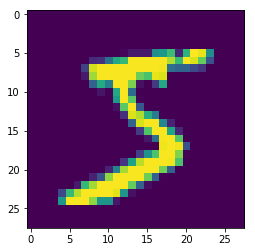

In [6]:
# Display image shape of image 
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
#Reshape image size
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
#Convert numpy array to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
Y_train = keras.utils.to_categorical(y_train, 10)
Y_test = keras.utils.to_categorical(y_test, 10)

In [11]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
# from keras.layers import Activation
# model = Sequential()


# model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
# model.add(BatchNormalization())

# model.add(Convolution2D(16, 3, 3, activation='relu')) # 24
# model.add(BatchNormalization())


# model.add(Convolution2D(32, 3, 3, activation='relu')) # 22
# model.add(BatchNormalization())
# model.add(Dropout(0.15))

# model.add(MaxPooling2D(pool_size=(2, 2))) # 11
# model.add(Convolution2D(10, 1, 1, activation='relu')) # 11
# model.add(BatchNormalization())

# model.add(Convolution2D(16, 3, 3, activation='relu')) # 9
# model.add(BatchNormalization())
# model.add(Convolution2D(32, 3, 3, activation='relu')) # 7
# model.add(BatchNormalization())
# model.add(Dropout(0.15))

# model.add(Convolution2D(10, 1, activation='relu')) #7
# model.add(BatchNormalization())
# model.add(Convolution2D(10, 7)) #seeing 7x7 receptive fild
# model.add(Flatten())
# model.add(Activation('softmax'))


In [12]:
#1st sample N/W (No Batch Norm , NO dropout)
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26

model.add(Convolution2D(16, 3, 3, activation='relu')) # 24

model.add(Convolution2D(16, 3, 3, activation='relu')) # 22

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(10, 1, 1, activation='relu')) # 11

model.add(Convolution2D(16, 3, 3, activation='relu')) # 9
model.add(Convolution2D(32, 3, 3, activation='relu')) # 7

model.add(Convolution2D(10, 1, activation='relu')) #7
model.add(Convolution2D(10, 7)) #seeing 7x7 receptive fild
model.add(Flatten())
model.add(Activation('softmax'))


Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-pack

In [0]:
#0.994
# from keras.layers import Activation
# model = Sequential()


# model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
# model.add(BatchNormalization())

# model.add(Convolution2D(16, 3, 3, activation='relu')) # 24
# model.add(BatchNormalization())
# model.add(Dropout(0.20))


# model.add(MaxPooling2D(pool_size=(2, 2))) # 12
# model.add(Convolution2D(16, 3, 3, activation='relu')) # 10
# model.add(BatchNormalization())
# model.add(Dropout(0.20))


# model.add(Convolution2D(16, 3, 3, activation='relu')) # 8
# model.add(Dropout(0.20))

# model.add(Convolution2D(10, 1, activation='relu')) #8
# # model.add(BatchNormalization())

# model.add(Convolution2D(10, 8)) #seeing 7x7 receptive fild
# model.add(Flatten())
# model.add(Activation('softmax'))


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1456      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 10)        170       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 16)          1456      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 32)          4640      
__________

In [0]:
def lr_schedule(epoch):
    lrate = 0.01
    if epoch > 90:
        lrate = 0.01
    elif epoch > 135:
        lrate = 0.001       
    return lrate
LR_scheduler = LearningRateScheduler(lr_schedule)

In [0]:
# filepath="1stbatch1assgn4-{epoch:02d}-{val_acc:.2f}.hdf5"
# checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint, LR_scheduler]
# callbacks_list = [LR_scheduler]

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

In [0]:
# datagen = ImageDataGenerator()

In [0]:
# x_aug = datagen.flow(X_train, Y_train, batch_size=32)


In [19]:
#1st 10 epochs

model.fit(X_train, Y_train,  epochs=10,
    verbose=1, validation_data=(X_test, Y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 229us/step - loss: 0.2816 - acc: 0.9117 - val_loss: 0.0786 - val_acc: 0.9771
Epoch 2/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.0774 - acc: 0.9767 - val_loss: 0.0531 - val_acc: 0.9834
Epoch 3/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.0594 - acc: 0.9818 - val_loss: 0.0605 - val_acc: 0.9805
Epoch 4/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.0494 - acc: 0.9846 - val_loss: 0.0504 - val_acc: 0.9840
Epoch 5/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.0434 - acc: 0.9869 - val_loss: 0.0417 - val_acc: 0.9865
Epoch 6/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.0380 - acc: 0.9881 - val_loss: 0.0592 - val_acc: 0.9834
Epoch 7/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.0361 - acc: 0.9884 - val_loss: 0.0450 

In [229]:
# 2nd 10 epochs

model.fit(X_train, Y_train,  epochs=10,
    verbose=1, validation_data=(X_test, Y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 251us/step - loss: 0.0257 - acc: 0.9917 - val_loss: 0.0335 - val_acc: 0.9896
Epoch 2/10
60000/60000 [==============================] - 14s 240us/step - loss: 0.0249 - acc: 0.9919 - val_loss: 0.0298 - val_acc: 0.9904
Epoch 3/10
60000/60000 [==============================] - 15s 244us/step - loss: 0.0219 - acc: 0.9925 - val_loss: 0.0361 - val_acc: 0.9895
Epoch 4/10
60000/60000 [==============================] - 14s 228us/step - loss: 0.0219 - acc: 0.9925 - val_loss: 0.0360 - val_acc: 0.9896
Epoch 5/10
60000/60000 [==============================] - 14s 229us/step - loss: 0.0203 - acc: 0.9936 - val_loss: 0.0313 - val_acc: 0.9910
Epoch 6/10
60000/60000 [==============================] - 14s 229us/step - loss: 0.0190 - acc: 0.9939 - val_loss: 0.0395 - val_acc: 0.9890
Epoch 7/10
60000/60000 [==============================] - 14s 228us/step - loss: 0.0170 - acc: 0.9947 - val_loss: 0.